# Binary calssifiaction: classify the movie reviews based on the sentiment of the review into "positive" or 'negative'

### Dataset used: IMDB movie reviews (50000 Reviews)

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import os
print(tf.__version__)

2.3.0


In [ ]:
# using the official tokenization script created by the Google team
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [ ]:
!pip install sentencepiece #This API will offer the encoding, decoding and training of Sentencepiece

     |████████████████████████████████| 1.1MB 2.9MB/s 


In [ ]:
# importing esssential libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub
import tokenization

In [ ]:
# print(tf.version)

In [ ]:
%%time
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"   # bert model loading
bert_layer = hub.KerasLayer(module_url, trainable=True)   #Wraps a Saved Model as a Keras Layer.

CPU times: user 27.1 s, sys: 5.38 s, total: 32.5 s
Wall time: 38.4 s


In [ ]:
pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
cd aug_7/

/content/drive/My Drive/aug_7


In [ ]:
ls

 BERT_binary_classi_V1.ipynb  'IMDB Dataset.csv'     tokenization.py
 final_bert_ner_model.ipynb    model_plot_1000.png


In [ ]:
data = pd.read_csv('IMDB Dataset.csv') # loading IMDB Dataset

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
labels = {'positive':1,'negative':0} # labelling encoding the target values

In [ ]:
data['sentiment'] =data['sentiment'].replace(labels) # replacing the target values with the encoded values

In [ ]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [ ]:

data.shape

(50000, 2)

In [ ]:
train = data.iloc[:10001]   # train and test split precentage 80 and 20 
test = data.iloc[10001:2000]  

In [ ]:
train

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
9996,Give me a break. How can anyone say that this ...,0
9997,This movie is a bad movie. But after watching ...,0
9998,This is a movie that was probably made to ente...,0
9999,Smashing film about film-making. Shows the int...,1


In [ ]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()  # loading vocab file which is of the model
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()  #lowecasing the vocab file
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case) # loading tokenizer 

In [ ]:
max_len=512     # predifining the max token length of the sentence 

# example of one sentence of 'bert_encode' function

In [ ]:
text = train['review'].iloc[0]

In [ ]:
text

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
text = tokenizer.tokenize(text)

In [ ]:
text

In [ ]:
text = text[:max_len-2]   #taking the text length of maximum 510 length because to add 'classifier' and 'separater' in the next step

In [ ]:
text

In [ ]:
input_sequence = ["[CLS]"] + text + ["[SEP]"] # adding clssifier and separater to the text

In [ ]:
input_sequence

In [ ]:
pad_len = max_len - len(input_sequence)

In [ ]:
pad_len

95

In [ ]:
tokens = tokenizer.convert_tokens_to_ids(input_sequence) # converting tokens into unique ids

In [ ]:
tokens

In [ ]:
len(tokens)

417

for a bert model we need 3 arrays 
1. all_tokens
2. all_masks
3. all_segment_ids

In [ ]:
tokens += [0] * pad_len     # padding the rest of the sequence with zeros/0

In [ ]:
tokens

In [ ]:
pad_masks = [1] * len(input_sequence) + [0] * pad_len       # where there are token numbers/ids assigning with 1 and 
                                                              # the rest with of the length with zeros 
pad_masks

In [ ]:
segment_ids = [0] * max_len # segment ids to indicate whether a token belongs to the first sequence or the second sequence
segment_ids

# 'bert_encode' function explanation

in the below function 'bert_encode' we tokenize each sentence and encode each token with unique 'token_id' and add 'attention_mask', 'segment_id' to give the input to the model

In [ ]:
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)   # tokenising the senetence. output--> list of words
            
        text = text[:max_len-2]    #taking the text length of maximum 510 length because to add 'classifier' and 'separater' in the next step
        input_sequence = ["[CLS]"] + text + ["[SEP]"]   # adding clssifier and separater to the text
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)  # converting the tokens to ids
        tokens += [0] * pad_len  # padding the rest of the sequence with zeros/0
        pad_masks = [1] * len(input_sequence) + [0] * pad_len # where there are token numbers/ids assigning with 1 and 
                                                              # the rest with of the length with zeros 
        
        segment_ids = [0] * max_len  # segment ids to indicate whether a token belongs to the first sequence or the second sequence
        
        all_tokens.append(tokens)           # appending tokens ids
        all_masks.append(pad_masks)         # appending attention masks ids
        all_segments.append(segment_ids)    # appending segment ids
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [ ]:
train_input = bert_encode(train.review.values, tokenizer, max_len=512)  # function call for encoding train_data
test_input = bert_encode(test.review.values, tokenizer, max_len=512)    # function call for encoding test_data
train_labels = train.sentiment.values   # taking the training data labels 
test_labels = test.sentiment.values     # taking the test data labels

In [ ]:
train_input

(array([[  101,  2028,  1997, ...,     0,     0,     0],
        [  101,  1037,  6919, ...,     0,     0,     0],
        [  101,  1045,  2245, ...,     0,     0,     0],
        ...,
        [  101,  2023,  2003, ...,     0,     0,     0],
        [  101, 21105,  2143, ...,     0,     0,     0],
        [  101,  1000,  2096, ...,     0,     0,     0]]),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [ ]:
train_input[0].shape

(10001, 512)

In [ ]:
test_input

(array([], dtype=float64), array([], dtype=float64), array([], dtype=float64))

In [ ]:
test_input[0].shape

(0,)

In [ ]:
train_labels

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
train_labels.shape

(10001,)

In [ ]:
test_labels

array([], dtype=int64)

In [ ]:
test_labels.shape

(0,)

# 'build_model' function explanation

in the below function 'build_model' we define our model with 
what are the inputs, 
the loss function to calculate the loss, 
the optimizer to how you should change your weights or learning rates of your neural network to reduce the losses,
the activation function at the output and the number of nodes in the output layer,
and metrics to calculate the score

In [ ]:
def build_model(bert_layer, max_len=512):
    

    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids") # tokenized text input
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask") # an input mask to hold out padding tokens
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids") # segment types when input mixes with different segments.

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :] #representations for the entire input sequences
    out = Dense(1, activation='sigmoid')(clf_output) # defining the output layer with 1 node(since we have binary classification) 
                                                    # and a sigmoid activation function which gives the probability output 

    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out) # defining the model with inputs and ouput
    model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy']) # defining the model with optimizer, loss-function and metrics

    return model

# summary of the model

In [ ]:
model = build_model(bert_layer, max_len=512)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 512)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 512)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 1024), (None 335141889   input_word_ids[0][0]             
                                                                 input_mask[0][0]      

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
# plot_model(model, to_file='model_plot_1000.png', show_shapes=True, show_layer_names=True)

# Model Training

In [ ]:
import datetime

In [ ]:
# type(train_input[0][0][0])

In [ ]:
import os

In [ ]:
! rm -rf ./logs/

In [ ]:
# log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [ ]:
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir,histogram_freq=1)

In [ ]:
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
%load_ext tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
# tf.keras.callbacks.TensorBoard()

In [ ]:
# checkpoint = ModelCheckpoint('IMDB_classi_model.h5', monitor='val_loss', save_best_only=True)

train_history = model.fit(
    train_input, train_labels,   # fitting the model on the training data
    validation_split=0.2,        # validating on 20% of the data
    epochs=3,                    
    callbacks=[tensorboard_callback],
    batch_size=2
)

Epoch 1/3
   2/1600 [..............................] - ETA: 1:56:42 - loss: 0.6598 - accuracy: 0.7500WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 1.4476s vs `on_train_batch_end` time: 6.7895s). Check your callbacks.


1600/1600 [==============================] - ETA: 0s - loss: 0.2497 - accuracy: 0.9122WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.1503s vs `on_test_batch_end` time: 0.4733s). Check your callbacks.


1600/1600 [==============================] - 3346s 2s/step - loss: 0.2497 - accuracy: 0.9122 - val_loss: 0.4322 - val_accuracy: 0.8050
Epoch 2/3
1600/1600 [==============================] - 3334s 2s/step - loss: 0.0744 - accuracy: 0.9731 - val_loss: 0.2619 - val_accuracy: 0.9075
Epoch 3/3
1600/1600 [==============================] - 3333s 2s/step - loss: 0.0430 - accuracy: 0.9859 - val_loss: 0.3022 - val_accuracy: 0.9150


In [ ]:
# list all data in history
print(train_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
%tensorboard --logdir logs

In [ ]:
import matplotlib.pyplot as plt

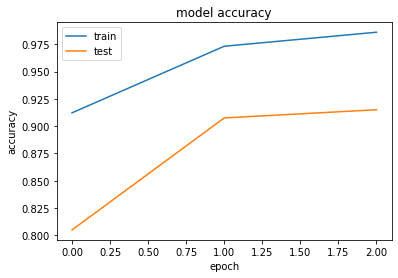

In [ ]:
# summarize history for accuracy
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


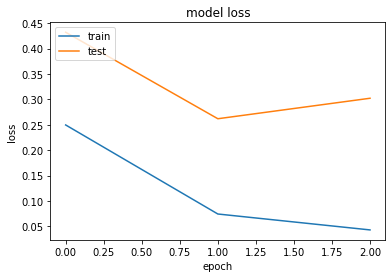

In [ ]:
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pwd

'/content/drive/My Drive/task_aug_7/IMBD'

In [ ]:
ls

 IMDB_classi_model.h5  'IMDB Dataset.csv'


# Prediction

In [ ]:
test_pred = model.predict(test_input)         # predicting on the test data

In [ ]:
test_pred

array([[0.00182896],
       [0.37909555],
       [0.05824261],
       ...,
       [0.00391522],
       [0.00431387],
       [0.00325493]], dtype=float32)

In [ ]:
len(test_pred)

9999

in the below cell we take the thresold of 0.50 and what falls above the threshold is prediction 1 and what falls below is prediction 0

In [ ]:
final_test_pred = []
for i in test_pred:
    if i>0.50:
    final_test_pred.append(1)
    else:
    final_test_pred.append(0)

In [ ]:
final_test_pred

In [ ]:
len(final_test_pred)

9999

# Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(final_test_df['actual_values'],final_test_df['predicted_values'])

0.9157915791579158

In [ ]:
pwd

'/content/drive/My Drive/task_aug_7/IMBD'

In [ ]:
!mv '/content/drive/My Drive/task_aug_7/IMBD/final_prediction_IMDB.csv' '/content/drive/My Drive/'

# final output

creating a new dataframe and placing the actual and predicted values side-by-side

In [ ]:
final_test_df = pd.DataFrame({'review':test['review'],'actual_values':test['sentiment'],'predicted_values':final_test_pred})

In [ ]:
final_test_df

,review,actual_values,predicted_values
40001,I was excited to see a sitcom that would hopef...,0,0
40002,When you look at the cover and read stuff abou...,0,0
40003,"Like many others, I counted on the appearance ...",0,0
40004,"This movie was on t.v the other day, and I did...",0,0
40005,Hickory Dickory Dock was a good Poirot mystery...,1,1
...,...,...,...
49995,I thought this movie did a down right good job...,1,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,0
49997,I am a Catholic taught in parochial elementary...,0,0
49998,I'm going to have to disagree with the previou...,0,0


In [ ]:
final_test_df.to_csv('final_prediction_IMDB.csv')

In [ ]:
ls

 final_prediction_IMDB.csv   IMDB_classi_model.h5  'IMDB Dataset.csv'
